## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge = study_results.merge(mouse_metadata, left_on='Mouse ID', right_on='Mouse ID', how='outer')

# Remove rows with duplicate Mouse ID and Timepoint 
mouse_results = mouse_merge.drop_duplicates(['Mouse ID', 'Timepoint'])

# Display the data table for preview
mouse_results

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1888    Male          22          17  
1889    Male          22          17  
1890    Male          22          17  
1891    Male          22          17  
1892    Male          22          17  

[1888 rows x 8 columns]

## Summary Statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_regimen = mouse_results.groupby(mouse_results['Drug Regimen'])

mean_tumor_df = mouse_regimen['Tumor Volume (mm3)'].mean()
mean_tumor = mean_tumor_df.reset_index()['Tumor Volume (mm3)']

median_tumor_df = mouse_regimen['Tumor Volume (mm3)'].median()
median_tumor = median_tumor_df.reset_index()['Tumor Volume (mm3)']

var_tumor_df = mouse_regimen['Tumor Volume (mm3)'].var()
var_tumor = var_tumor_df.reset_index()['Tumor Volume (mm3)']

std_tumor_df = mouse_regimen['Tumor Volume (mm3)'].std()
std_tumor = std_tumor_df.reset_index()['Tumor Volume (mm3)']

sem_tumor_df = mouse_regimen['Tumor Volume (mm3)'].sem()
sem_tumor = sem_tumor_df.reset_index()['Tumor Volume (mm3)']

drug_regimen_df = mouse_regimen.count()
drug_regimen = drug_regimen_df.reset_index()['Drug Regimen']
drug_regimen

# This method produces everything in a single groupby function
summary_statistics = pd.DataFrame({'Drug Regimen': drug_regimen, 'Tumor Volume Mean': mean_tumor, 
                                   'Tumor Volume Median': median_tumor, 'Tumor Volume Variance': var_tumor, 
                                   'Tumor Volume St Dev': std_tumor, 'Tumor Volume SEM': sem_tumor})
summary_statistics

Drug Regimen  Tumor Volume Mean  Tumor Volume Median  Tumor Volume Variance  \
0    Capomulin          40.675741            41.557809              24.947764   
1     Ceftamin          52.591172            51.776157              39.290177   
2    Infubinol          52.884795            51.820584              43.128684   
3     Ketapril          55.235638            53.698743              68.553577   
4     Naftisol          54.331565            52.509285              66.173479   
5      Placebo          54.033581            52.288934              61.168083   
6     Propriva          52.393463            50.909965              43.138803   
7     Ramicane          40.216745            40.673236              23.486704   
8     Stelasyn          54.233149            52.431737              59.450562   
9    Zoniferol          53.236507            51.818479              48.533355   

   Tumor Volume St Dev  Tumor Volume SEM  
0             4.994774          0.329346  
1             6.268188          0.469821  
2             6.567243          0.492236  
3             8.279709          0.603860  
4             8.134708          0.596466  
5             7.821003          0.581331  
6             6.568014          0.525862  
7             4.846308          0.320955  
8             7.710419          0.573111  
9             6.966589          0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

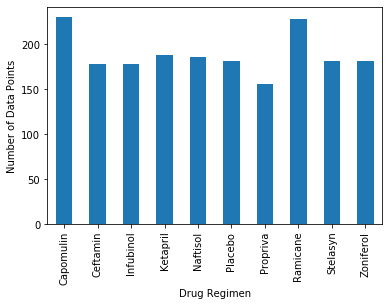

In [3]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_timepoints_df = mouse_regimen['Timepoint'].count()
count_timepoints = count_timepoints_df.reset_index()['Timepoint']

bar_plot_df = pd.DataFrame({'Drug Regimen': drug_regimen, 'Count Timepoints': count_timepoints})

bar_plot_df.plot(kind='bar', x='Drug Regimen', y='Count Timepoints', legend=False).set_ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

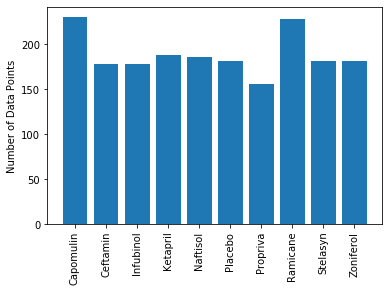

In [4]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(drug_regimen, count_timepoints)
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")

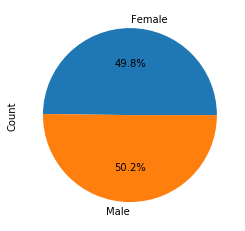

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_df = mouse_results.groupby(mouse_results['Sex']).count()
mouse_gender = mouse_gender_df.reset_index()['Sex']
mouse_gender

gender_count_df = mouse_results.groupby(mouse_results['Sex']).nunique()
del gender_count_df['Sex']
gender_count = gender_count_df.reset_index()['Mouse ID']
gender_count

pie_plot_df = pd.DataFrame({'Gender': mouse_gender, 'Count': gender_count})

# used partial code from this url: https://kontext.tech/column/code-snippets/402/pandas-dataframe-plot-pie-chart
pie_plot_df.groupby('Gender').sum().plot(kind='pie', y='Count', legend=False, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2507286f748>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

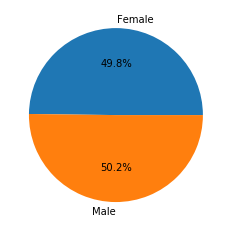

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_plot_df['Count'], labels=pie_plot_df['Gender'], autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = pd.DataFrame({'Timepoint': mouse_results.groupby(['Mouse ID'])['Timepoint'].max()}).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = last_time.merge(mouse_results, on=['Mouse ID', 'Timepoint'], how='inner')
merge_df

# used partial code from this url: 
# https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/#:~:text=One%20way%20to%20filter%20by,based%20on%20year's%20value%202002.
is_capomulin = merge_df['Drug Regimen']=='Capomulin'
capomulin_df = merge_df[is_capomulin]
capomulin_df

is_ramicane = merge_df['Drug Regimen']=='Ramicane'
ramicane_df = merge_df[is_ramicane]
ramicane_df

is_infubinol = merge_df['Drug Regimen']=='Infubinol'
infubinol_df = merge_df[is_infubinol]
infubinol_df

is_ceftamin = merge_df['Drug Regimen']=='Ceftamin'
ceftamin_df = merge_df[is_ceftamin]
ceftamin_df

# Create lists to fill with tumor vol data (for plotting)
capomulin_volume = capomulin_df['Tumor Volume (mm3)']

ramicane_volume = ramicane_df['Tumor Volume (mm3)']

infubinol_volume = infubinol_df['Tumor Volume (mm3)']

ceftamin_volume = ceftamin_df['Tumor Volume (mm3)']

In [8]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomuin data
capomulin_quartiles = capomulin_volume.quantile([.25,.5,.75])
lowerq = capomulin_quartiles[0.25]
upperq = capomulin_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print('Capomulin:')
print(f'Lower quartile: {lowerq}')
print(f'Upper quartile: {upperq}')
print(f'Interquartile range: {iqr}')
print(f'Values < {lower_bound} could be outliers')
print(f'Values > {upper_bound} could be outliers')
      
is_outlier = capomulin_df['Tumor Volume (mm3)'] < lower_bound 
lower_outlier_df = capomulin_df[is_outlier]
lower_outlier = lower_outlier_df['Tumor Volume (mm3)'].tolist()
print(f'Potential lower outliers: {lower_outlier}')
      
is_outlier = capomulin_df['Tumor Volume (mm3)'] > upper_bound 
upper_outlier_df = capomulin_df[is_outlier]
upper_outlier = upper_outlier_df['Tumor Volume (mm3)'].tolist()
print(f'Potential upper outliers: {upper_outlier}')
print('-----------------------------------------------')

# Ramicane data
ramicane_quartiles = ramicane_volume.quantile([.25,.5,.75])
lowerq = ramicane_quartiles[0.25]
upperq = ramicane_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print('Ramicane:')
print(f'Lower quartile: {lowerq}')
print(f'Upper quartile: {upperq}')
print(f'Interquartile range: {iqr}')
print(f'Values < {lower_bound} could be outliers')
print(f'Values > {upper_bound} could be outliers')
      
is_outlier = ramicane_df['Tumor Volume (mm3)'] < lower_bound 
lower_outlier_df = ramicane_df[is_outlier]
lower_outlier = lower_outlier_df['Tumor Volume (mm3)'].tolist()
print(f'Potential lower outliers: {lower_outlier}')
      
is_outlier = ramicane_df['Tumor Volume (mm3)'] > upper_bound 
upper_outlier_df = ramicane_df[is_outlier]
upper_outlier = upper_outlier_df['Tumor Volume (mm3)'].tolist()
print(f'Potential upper outliers: {upper_outlier}')
print('-----------------------------------------------')

# Infubinol data
infubinol_quartiles = infubinol_volume.quantile([.25,.5,.75])
lowerq = infubinol_quartiles[0.25]
upperq = infubinol_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print('Infubinol:')
print(f'Lower quartile: {lowerq}')
print(f'Upper quartile: {upperq}')
print(f'Interquartile range: {iqr}')
print(f'Values < {lower_bound} could be outliers')
print(f'Values > {upper_bound} could be outliers')
      
is_outlier = infubinol_df['Tumor Volume (mm3)'] < lower_bound 
lower_outlier_df = infubinol_df[is_outlier]
lower_outlier = lower_outlier_df['Tumor Volume (mm3)'].tolist()
print(f'Potential lower outliers: {lower_outlier}')
      
is_outlier = infubinol_df['Tumor Volume (mm3)'] > upper_bound 
upper_outlier_df = infubinol_df[is_outlier]
upper_outlier = upper_outlier_df['Tumor Volume (mm3)'].tolist()
print(f'Potential upper outliers: {upper_outlier}')
print('-----------------------------------------------')

# Ceftamin data
ceftamin_quartiles = ceftamin_volume.quantile([.25,.5,.75])
lowerq = ceftamin_quartiles[0.25]
upperq = ceftamin_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print('Ceftamin:')
print(f'Lower quartile: {lowerq}')
print(f'Upper quartile: {upperq}')
print(f'Interquartile range: {iqr}')
print(f'Values < {lower_bound} could be outliers')
print(f'Values > {upper_bound} could be outliers')
      
is_outlier = ceftamin_df['Tumor Volume (mm3)'] < lower_bound 
lower_outlier_df = ceftamin_df[is_outlier]
lower_outlier = lower_outlier_df['Tumor Volume (mm3)'].tolist()
print(f'Potential lower outliers: {lower_outlier}')
      
is_outlier = ceftamin_df['Tumor Volume (mm3)'] > upper_bound 
upper_outlier_df = ceftamin_df[is_outlier]
upper_outlier = upper_outlier_df['Tumor Volume (mm3)'].tolist()
print(f'Potential upper outliers: {upper_outlier}')
print('-----------------------------------------------')

Capomulin:
Lower quartile: 32.37735684
Upper quartile: 40.1592203
Interquartile range: 7.781863460000004
Values < 20.70456164999999 could be outliers
Values > 51.83201549 could be outliers
Potential lower outliers: []
Potential upper outliers: []
-----------------------------------------------
Ramicane:
Lower quartile: 31.56046955
Upper quartile: 40.65900627
Interquartile range: 9.098536719999998
Values < 17.912664470000003 could be outliers
Values > 54.30681135 could be outliers
Potential lower outliers: []
Potential upper outliers: []
-----------------------------------------------
Infubinol:
Lower quartile: 54.04860769
Upper quartile: 65.52574285
Interquartile range: 11.477135160000003
Values < 36.83290494999999 could be outliers
Values > 82.74144559000001 could be outliers
Potential lower outliers: [36.321345799999996]
Potential upper outliers: []
-----------------------------------------------
Ceftamin:
Lower quartile: 48.72207785
Upper quartile: 64.29983003
Interquartile range: 1

([<matplotlib.axis.XTick at 0x250728bb6c8>,
 <a list of 4 Text xticklabel objects>)

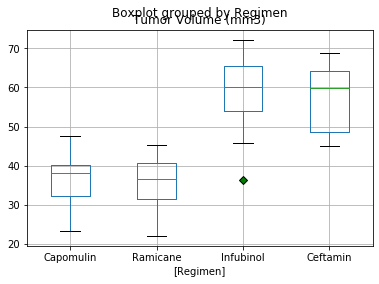

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# used partial code from this url by user Parfait: 
# https://stackoverflow.com/questions/42004381/box-plot-of-a-many-pandas-dataframes

capomulin_location = pd.DataFrame({'Drug Regimen': capomulin_df['Drug Regimen'], 
                                   'Tumor Volume (mm3)': capomulin_volume}).assign(Regimen=1)
capomulin_location

ramicane_location = pd.DataFrame({'Drug Regimen': ramicane_df['Drug Regimen'], 
                                   'Tumor Volume (mm3)': ramicane_volume}).assign(Regimen=2)
ramicane_location

infubinol_location = pd.DataFrame({'Drug Regimen': infubinol_df['Drug Regimen'], 
                                   'Tumor Volume (mm3)': infubinol_volume}).assign(Regimen=3)
infubinol_location

ceftamin_location = pd.DataFrame({'Drug Regimen': ceftamin_df['Drug Regimen'], 
                                   'Tumor Volume (mm3)': ceftamin_volume}).assign(Regimen=4)
ceftamin_location

cdf = pd.concat([capomulin_location, ramicane_location, infubinol_location, ceftamin_location])
cdf

green_diamond = dict(markerfacecolor='g', marker='D')

cdf.boxplot(by='Regimen', flierprops=green_diamond)    
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
